***DATA SET***

In [3]:
import os
import numpy as np
import tensorflow as tf
import re
import matplotlib.pyplot as plt

In [4]:
datapath = r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\P8\Clases-64"
imgpath = datapath + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, datapath, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0

dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('Suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\P8\Clases-64\
C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\P8\Clases-64\CLASE_1 1
C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\P8\Clases-64\CLASE_2 1872
C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\P8\Clases-64\CLASE_3 1872
C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\P8\Clases-64\CLASE_4 1872
C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\P8\Clases-64\CLASE_5 1872
C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\P8\Clases-64\CLASE_6 1872
Directorios leidos: 6
Imagenes en cada directorio [1873, 1872, 1872, 1872, 1872, 1871]
Suma Total de imagenes en subdirs: 11232


***Creación Etiquetas***

In [5]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)   
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  11232


In [6]:
posturas=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    posturas.append(name[len(name)-1])
    indice=indice+1

0 CLASE_1
1 CLASE_2
2 CLASE_3
3 CLASE_4
4 CLASE_5
5 CLASE_6


In [7]:
y = np.array(labels)
X = np.array(images) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  6
Output classes :  [0 1 2 3 4 5]


***SPLIT VALIDACIÓN Y TRAIN***

In [8]:
from sklearn.model_selection import train_test_split

# Test data // for testing at the end after tranning 
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.1)
#print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

# validation data // for testing when tranning 

train_X,val_X,train_Y,val_Y = train_test_split(train_X,train_Y,test_size=0.1)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('validation data shape : ', val_X.shape, val_Y.shape)

Testing data shape :  (1124, 64, 64, 4) (1124,)
Training data shape :  (9097, 64, 64, 4) (9097,)
validation data shape :  (1011, 64, 64, 4) (1011,)


***Muestras***

In [9]:
img_x = 64
img_y = 64
img_z = 4
num_classes = 6

batch_size = 32
epochs = 100

# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
input_shape = (img_x, img_y, img_z)

# convert the data to the right type
#train_X = train_X.reshape(train_X.shape[0], img_x, img_y, img_z)
#test_X = test_X.reshape(test_X.shape[0], img_x, img_y, img_z)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
val_X = val_X.astype('float32')

print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(val_X.shape[0], 'val samples')
print(test_X.shape[0], 'test samples')

train_X shape: (9097, 64, 64, 4)
9097 train samples
1011 val samples
1124 test samples


***VALIDACIÓN CRUZADA - SIMPLE***

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report

custom_early_stopping = EarlyStopping(monitor="loss", patience=3) 

# Define el número de pliegues para la validación cruzada
k = 5

# Separa los datos en pliegues para la validación cruzada simple
kf = KFold(n_splits=k, shuffle=True)

train_scores = []
val_scores = []
class_reports = []

fold_index = 1  # Inicializar el índice del pliegue

for train_index, val_index in kf.split(train_X):
    train_X_fold, val_X_fold = train_X[train_index], train_X[val_index]
    train_Y_fold, val_Y_fold = train_Y[train_index], train_Y[val_index]

    # Crea un directorio para guardar los registros de TensorBoard para este pliegue
    fold_log_dir = r'C:\Users\JUANPABLOGASCA\Desktop\ValidacionCruzada\Tensorboard\\64\P08\_{}'.format(fold_index)
    tensorboard_callback = TensorBoard(log_dir=fold_log_dir)

    # Define el modelo
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(8, kernel_size=(3, 3), strides = (2,2), padding = 'same' ,activation='relu', input_shape=input_shape),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(40, kernel_size=(3, 3), strides = (2,2),padding = 'same' ,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides = (2,2), padding = 'same',activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(56, kernel_size=(3, 3), strides = (2,2), padding = 'same',activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    # Define la función de pérdida, el optimizador y las métricas
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                  metrics=['accuracy'])

    # Entrena el modelo en este pliegue
    model_train = model.fit(train_X_fold, train_Y_fold, batch_size=32, epochs=100, verbose=1, 
                            validation_data=(val_X_fold, val_Y_fold), callbacks=[custom_early_stopping, tensorboard_callback])
    
    # Evalúa el modelo en este pliegue
    train_score = model.evaluate(train_X_fold, train_Y_fold, verbose=0)
    val_score = model.evaluate(val_X_fold, val_Y_fold, verbose=0)

    print('Fold train loss: {}, Fold train accuracy: {}, Fold val loss: {}, Fold val accuracy: {}'.format(train_score[0], train_score[1], val_score[0], val_score[1]))

    train_scores.append(train_score[1])
    val_scores.append(val_score[1])

    # Realiza predicciones en el conjunto de validación
    val_predictions = model.predict(val_X_fold)
    val_predictions = np.argmax(val_predictions, axis=1)

    # Calcula el informe de clasificación
    val_report = classification_report(val_Y_fold, val_predictions)
    class_reports.append(val_report)
    
    print('Fold {} - Classification Report:\n{}'.format(fold_index, val_report))
# 
    fold_index += 1

# Calcula y muestra el promedio de las puntuaciones de entrenamiento y validación en todos los pliegues
print('Average train accuracy: {}, Average validation accuracy: {}'.format(np.mean(train_scores), np.mean(val_scores)))

# Evalúa el modelo en el conjunto de prueba
test_score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))

***Parametros CNN***

In [18]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 16, 16, 8)         296       
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 8)         0         
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 40)          2920      
                                                                 
 dropout_17 (Dropout)        (None, 8, 8, 40)          0         
                                                                 
 conv2d_18 (Conv2D)          (None, 4, 4, 64)          23104     
                                                                 
 dropout_18 (Dropout)        (None, 4, 4, 64)          0         
                                                                 
 conv2d_19 (Conv2D)          (None, 2, 2, 56)         

***Gráficas de Validación***

In [101]:
from matplotlib import pyplot as plt
def visualizacion_resultados(model):
  
    fig, ax = plt.subplots(1,2)
    acc = model.history['accuracy']
    loss = model.history['loss']
    val_acc = model.history['val_accuracy']
    val_loss = model.history['val_loss']
    epochs  = range(len(acc))
    fig.set_size_inches(16,9)

    ax[0].plot(epochs,acc,'ko-',label = 'Train Accuracy')
    ax[0].plot(epochs,val_acc,'bo-',label = 'Validation Acurracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    #plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Validation\P06_S1_32_ACC.png",bbox_inches = 'tight')


    ax[1].plot(epochs,loss,'ko-',label = 'Train Loss')
    ax[1].plot(epochs,val_loss,'bo-',label = 'Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\ValidacionCruzada\Gráfica_Train\P05_S1_64_ACC_LOSS.png",bbox_inches = 'tight')
    #plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\Pacientes_CNN\Validation\\32_4\P01_S1_32_ACC_LOSS.png",bbox_inches = 'tight')
    plt.show()




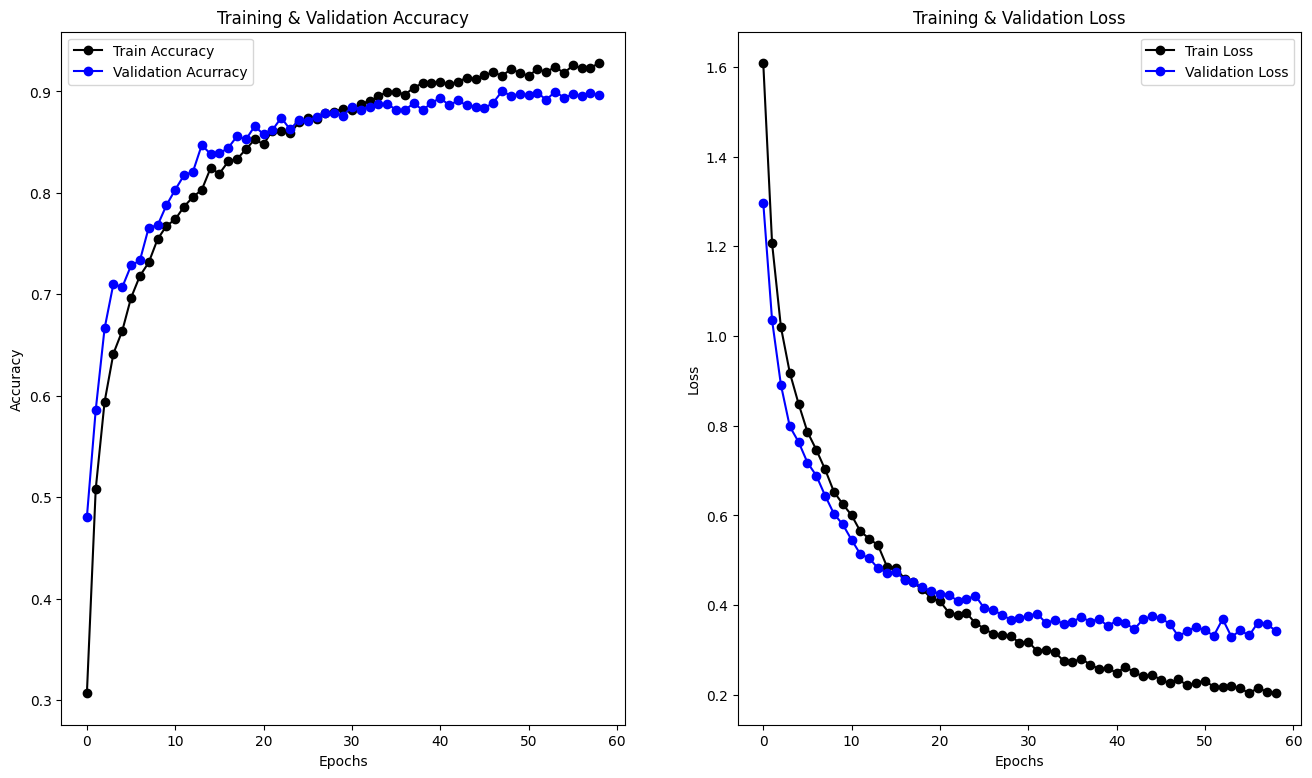

In [102]:
visualizacion_resultados(model_train)

***Save H5***

In [103]:
if os.path.isfile(r"C:\Users\JUANPABLOGASCA\Desktop\ValidacionCruzada\H5\P05_S1_64_CNN.h5") is False:
    model.save(r"C:\Users\JUANPABLOGASCA\Desktop\ValidacionCruzada\H5\P05_S1_64_CNN.h5")

***Matriz de Confusión sin Normalizar***

36/36 [==============================] - 5s 126ms/step
Confusion Matrix
[[163   4   2   3  11   0]
 [  2 182   5   8   5   2]
 [  1  14 163   0   3   0]
 [  9  14   5 153   6   2]
 [ 10   4   0   0 168   0]
 [  1   1   0   0   0 183]]


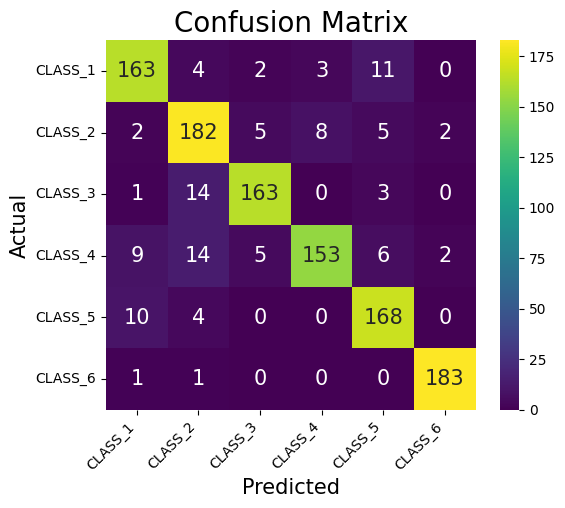

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sn

#convert tests labels in single-digits instead of one-hot encoding
y_test_arg = np.array(test_Y, dtype=int)

Y_pred = np.argmax(model.predict(test_X),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

#Normalizado
#np.round(cm/np.sum(cm,axis =1).reshape(-1,1),2)

#Confusion matrix
cm = confusion_matrix(y_test_arg, Y_pred)

labels=["CLASS_1","CLASS_2","CLASS_3","CLASS_4","CLASS_5","CLASS_6"] 
#cm = np.round(cm/np.sum(cm,axis =1).reshape(-1,1),1)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
ax = plt.axes()
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, square=True, cbar=True, cmap="viridis", fmt='g')
ax.set_title('Confusion Matrix', fontsize =20)
ax.set_ylim(0, 6) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel("Predicted",fontsize =15) 
plt.ylabel("Actual",fontsize =15) 
ax.invert_yaxis() #optional
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels, rotation=0, ha='right')
plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\ValidacionCruzada\Matriz Confusión\Normal\P05_S1_64.png", bbox_inches = 'tight')

***Matriz de Confusión Normalizada***

36/36 [==============================] - 5s 143ms/step
Confusion Matrix
[[163   4   2   3  11   0]
 [  2 182   5   8   5   2]
 [  1  14 163   0   3   0]
 [  9  14   5 153   6   2]
 [ 10   4   0   0 168   0]
 [  1   1   0   0   0 183]]


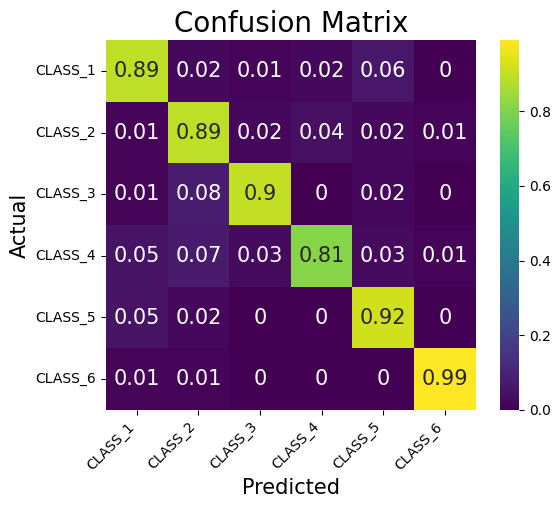

In [105]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

#convert tests labels in single-digits instead of one-hot encoding
y_test_arg = np.array(test_Y, dtype=int)
Y_pred = np.argmax(model.predict(test_X),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

#Normalizado
#np.round(cm/np.sum(cm,axis =1).reshape(-1,1),2)

#Confusion matrix
cm = confusion_matrix(y_test_arg, Y_pred)

labels=["CLASS_1","CLASS_2","CLASS_3","CLASS_4","CLASS_5","CLASS_6"] 
cm = np.round(cm/np.sum(cm,axis =1).reshape(-1,1),2)
df_cm = pd.DataFrame(cm, labels, labels)
ax = plt.axes()
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, square=True, cbar=True, cmap="viridis", fmt='g')
ax.set_title('Confusion Matrix', fontsize =20)
ax.set_ylim(0, 6) #this manually corrects the cutoff issue in sns.heatmap found in matplotlib ver 3.1.1
plt.xlabel("Predicted",fontsize =15) 
plt.ylabel("Actual",fontsize =15) 
ax.invert_yaxis() #optional
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels, rotation=0, ha='right')
plt.savefig(r"C:\Users\JUANPABLOGASCA\Desktop\ValidacionCruzada\Matriz Confusión\Normalizada\P05_S1_64.png", bbox_inches = 'tight')

***PREDICCIÓN Y GENERACIÓN DE METRICAS***

In [106]:
class_metrics = []
overall_metrics = []
class_labels = [0,1,2,3,4,5]

from sklearn.metrics import classification_report, accuracy_score

# Obtén las predicciones en el conjunto de validación
val_predictions = np.argmax(model.predict(val_X_fold), axis=1)

# Calcula las métricas por clases
class_report = classification_report(val_Y_fold, val_predictions, target_names=class_labels, output_dict=True)
class_metrics.append(class_report)

# Calcula las métricas generales
overall_accuracy = accuracy_score(val_Y_fold, val_predictions)
overall_metrics.append(overall_accuracy)


57/57 [==============================] - 8s 132ms/step


***Métricas Generales de cada Fold***

In [107]:
# Muestra la precisión obtenida en cada pliegue
for i in range(k):
    print('Fold {}: Train accuracy: {}, Validation accuracy: {}'.format(i+1, train_scores[i], val_scores[i]))


Fold 1: Train accuracy: 0.9942283630371094, Validation accuracy: 0.8868131637573242
Fold 2: Train accuracy: 0.9906554818153381, Validation accuracy: 0.8785714507102966
Fold 3: Train accuracy: 0.9945039749145508, Validation accuracy: 0.9004947543144226
Fold 4: Train accuracy: 0.9954658150672913, Validation accuracy: 0.8971962332725525
Fold 5: Train accuracy: 0.9978016018867493, Validation accuracy: 0.8960967659950256


***Métricas Específicas por cada Fold***

In [108]:
# Calcula el informe de clasificación por cada clase

val_report = classification_report(val_Y_fold, val_predictions)
class_reports.append(val_report)

for i, report in enumerate(class_reports):
    print('Fold {} - Classification Report:'.format(i+1))
    print(report)


Fold 1 - Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       292
           1       0.83      0.85      0.84       322
           2       0.91      0.92      0.91       308
           3       0.87      0.87      0.87       327
           4       0.91      0.89      0.90       312
           5       0.95      0.96      0.96       259

    accuracy                           0.89      1820
   macro avg       0.89      0.89      0.89      1820
weighted avg       0.89      0.89      0.89      1820

Fold 2 - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       304
           1       0.82      0.81      0.82       288
           2       0.88      0.94      0.91       318
           3       0.80      0.86      0.83       300
           4       0.90      0.91      0.91       302
           5       0.99      0.95      0.97       308

    accuracy 

***Promedio de Métricas Generales***

In [109]:
# Calcula el promedio de las métricas generales
average_overall_accuracy = np.mean(overall_metrics)

# Calcula las métricas por clases promediadas en todos los pliegues
average_class_metrics = {}
for class_label in class_labels:
    precision_list = [report[class_label]['precision'] for report in class_metrics]
    recall_list = [report[class_label]['recall'] for report in class_metrics]
    f1_list = [report[class_label]['f1-score'] for report in class_metrics]

    average_precision = np.mean(precision_list)
    average_recall = np.mean(recall_list)
    average_f1 = np.mean(f1_list)

    average_class_metrics[class_label] = {
        'precision': average_precision,
        'recall': average_recall,
        'f1-score': average_f1
    }

# Imprime las métricas generales promediadas
print("Promedio Total")
print('Average overall accuracy: {:.4f}'.format(average_overall_accuracy))
print("----------------------------------------------------")


# Imprime las métricas por clases promediadas en todos los pliegues
for class_label in class_labels:
    metrics = average_class_metrics[class_label]
    print('Metrics for class {}: Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}'.format(class_label, metrics['precision'], metrics['recall'], metrics['f1-score']))


Promedio Total
Average overall accuracy: 0.8961
----------------------------------------------------
Metrics for class 0: Precision: 0.9132, Recall: 0.8374, F1-score: 0.8736
Metrics for class 1: Precision: 0.7890, Recall: 0.8265, F1-score: 0.8073
Metrics for class 2: Precision: 0.9344, Recall: 0.9314, F1-score: 0.9329
Metrics for class 3: Precision: 0.8961, Recall: 0.8562, F1-score: 0.8757
Metrics for class 4: Precision: 0.8910, Recall: 0.9256, F1-score: 0.9079
Metrics for class 5: Precision: 0.9501, Recall: 0.9848, F1-score: 0.9672
